# SyriaTel Customer Churn ML Project

![customer_churn_prediction](images/customer_churn_prediction.png)

Project by:
- **Name**:  Julius Kinyua Njeri
- **Email**: juliusczar36@gmail.com
- **Date**: June 2024
- **Github Link**: https://github.com/CzarProCoder/SyriaTel_Customer_Churn_ML
- **LinkedIN**: https://www.linkedin.com/in/julius-kinyua
- **Twitter(X)**: https://x.com/Juliuskczar
- **Website**: https://lyonec.com/

# Project Overview

SyriaTel, a telecommunications company, is concerned about customer churn, where customers stop using their services. To address this, the company has gathered data on customer behavior to identify those likely to leave and implement strategies to retain them, as losing customers is costly.

The term “churn” refers to customers leaving the company, and the current churn rate is approximately 14%. Aiming to reduce this rate to about 7%, the project utilized the provided dataset to address key questions:

- Identifying the main features that determine customer churn
- Uncovering any predictable patterns
- Exploring how SyriaTel can leverage these insights to implement cost-effective solutions.

The project aims to develop a classification model to predict customer churn using machine learning techniques. Following the CRISP-DM methodology, the project involves six stages: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. By analyzing the dataset, we aim to uncover patterns and factors driving customer churn and create a predictive model to help reduce customer attrition.

# I: Business Understanding

**Problem Statement**

SyriaTel, a telecommunications company, is experiencing high customer churn as many customers switch to competitors. To address this, the company aims to develop a churn prediction model to identify factors associated with churn and improve customer retention, ultimately boosting profitability.

**Objectives and Success Metrics**

The project aims to:

- Identify key factors leading to customer churn.
- Develop an accurate churn prediction model.
- Implement strategies to retain at-risk customers.

Success will be measured by:

- Achieving a recall score of 0.8 with the prediction model.
- Identifying significant features contributing to churn.
- Providing actionable recommendations to reduce churn and enhance retention.
- Demonstrating the value of proactive retention strategies in reducing revenue losses.

# II: Data Understanding

In [50]:
# Import relevant packgaes

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

**Structure and content**

Let's start by viewing the content of the churn dataset. This is essential for us to understand the general structure of the data in terms of the columns and rows patterns.

In [51]:
df = pd.read_csv('data/dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Dataset Summary**

From the above overview from the info method, we are able to track down the number of columns and rows in out dataset

In [53]:
print(f'Number of Columns = {df.shape[0]} \n\nNumber of Rows = {df.shape[1]} ')

Number of Columns = 3333 

Number of Rows = 21 


In [54]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [55]:
def col_info(data):
    """
    This function provides a summary of the column data types.
    """

    col_names = data.columns
    num_cols = data.select_dtypes(int).columns
    cat_cols = data.select_dtypes(object).columns
    boolean_cols = data.select_dtypes(bool).columns
    float_cols = data.select_dtypes(float).columns
    shape = data.shape

    print('col_names: \n\t', col_names)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('num_cols: \n\t', num_cols)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('cat_cols: \n\t', cat_cols)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('boolean_cols: \n\t', boolean_cols)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('float_cols: \n\t', float_cols)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print('The shape: \n\t', shape)
    print('=====================================================================================')
    print('=====================================================================================\n\n')
    print(f"There are {len(num_cols)} numeric type columns, {len(cat_cols)} object type columns, and {len(float_cols)} float type columns out of {shape[1]}")

In [56]:
col_info(df)

col_names: 
	 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


num_cols: 
	 Index([], dtype='object')


cat_cols: 
	 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


boolean_cols: 
	 Index(['churn'], dtype='object')


float_cols: 
	 Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge'],
      dtype='object')


The shape: 
	 (3333, 21)


There are 0 numeric type columns, 4 object type co

In our case, it is important to distinguish the number of customer churn from the rest

In [57]:
# Those who churned
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

## Data Visualization

**Targe Variable** - churn

- Out of the 3,333 customers in this dataset, 483 ended their contracts with SyriaTel, resulting in an imbalanced dataset with a churn rate of 14.5%.
- This imbalance must be addressed during preprocessing before modeling.
- Additionally, we will label encode the churn variable, converting it from a boolean to a numeric value. This transformation can be done prior to the train/test split, as it is straightforward and does not risk data leakage.

0    2850
1     483
Name: churn, dtype: int64 

0    0.855086
1    0.144914
Name: churn, dtype: float64


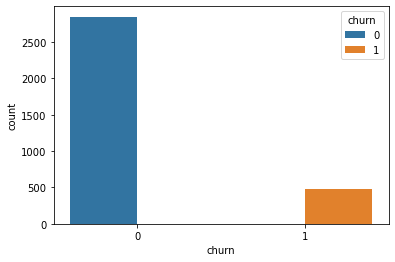

In [77]:
# Churn
print(df.churn.value_counts(), '\n')
print(df.churn.value_counts(normalize=True))

sns.countplot(data=df, x='churn',hue='churn')

plt.savefig('images/churn.png', facecolor='white')

# III: Data Preparation

Rename columns with '_' instead of spaces

In [59]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

Let's check for duplicates and missing data

In [60]:
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

In [61]:
cleaning(df)

"There are '0' missing values and '0' duplicated values in the dataset"

Next, we are going to perfom label encoding so that False becomes 0 and True becomes 1

In [62]:
encoder = LabelEncoder()
df['churn'] = encoder.fit_transform(df['churn'])
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

It appears that the phone_number is an object type, which may not be useful for predictions, but it can serve as a unique identifier for each customer. The international_plan and voice_main_plan variables can be converted to a binary numeric format, and the state variable, being nominal, can also be transformed into a numeric format.

In [63]:
df.select_dtypes('object')

,state,phone_number,international_plan,voice_mail_plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


**phone_number**

Since there are no duplicates, we can confidently drop the phone_number column as each row is unique.

In [64]:
print(sum(df.phone_number.value_counts().values>1))

0


In [65]:
df.drop('phone_number', axis=1, inplace=True)

**state**

This nominal categorical variable can be converted to numeric using methods like one-hot encoding or label encoding, depending on the needs of the machine learning algorithm. Alternatively, we could map states to their respective time zones to simplify and reduce the number of variables.

In [66]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
CO     66
WA     66
NV     66
RI     65
MA     65
MS     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

**International_plan and voice_mail_plan**

These variables can be transformed to a binary numeric format. With no set equal to zero and yes set equal to 1. Note that there are far more customers without international and voice mail plans.

0    0.90309
1    0.09691
Name: international_plan, dtype: float64

0    0.723372
1    0.276628
Name: voice_mail_plan, dtype: float64


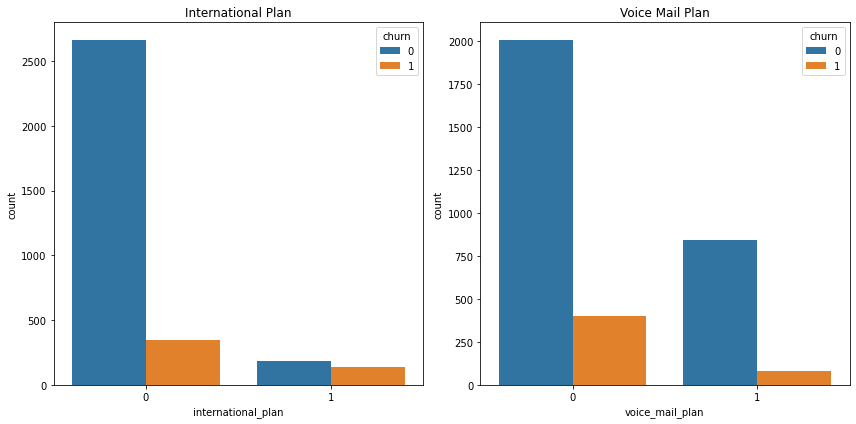

In [78]:
print(df['international_plan'].value_counts(normalize=True))
print()
print(df['voice_mail_plan'].value_counts(normalize=True))


#Performing label encoding
#No becomes 0 and yes becomes 1.
df['international_plan'] = encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = encoder.fit_transform(df['voice_mail_plan'])

#Histograms
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first count plot
sns.countplot(x='international_plan', hue='churn', data=df, ax=axes[0])
axes[0].set_title('International Plan')

# Plot the second count plot
sns.countplot(x='voice_mail_plan', hue='churn', data=df, ax=axes[1])
axes[1].set_title('Voice Mail Plan')

# Adjust layout
plt.tight_layout()

plt.savefig('images/International_plan_and_voice_mail_plan.png', facecolor='white')

# Show the plots
plt.show();

**Numeric Columns**

Examining the numeric columns, it appears that some information may be redundant. We will need to analyze the correlations to make an informed decision on consolidating these columns.

# IV: Modeling

# V: Evaluation

# VI: Conclusion and Recommendations